In [1]:
import numpy as np
import pandas as pd
import random,copy
import os

In [2]:
import pandas as pd
from sklearn.utils import shuffle
import keras
import tensorflow as tf
from sklearn import preprocessing

In [3]:
df = pd.read_csv("../input/induction-motor-multi-csv-files/combined_data_new.csv")

In [4]:
df["Label"].unique()

array([ 9.,  1.,  5.,  2.,  3.,  4.,  0., 10.,  6.])

In [5]:
rows = len(df)
cols = len(df.iloc[0])
col_names = ['X_Value', 'Acceleration', 'Acceleration_0', 'Acceleration_1', 'Voltage', 'Voltage_0', 'Voltage_1',
             'Voltage_2', 'Voltage_3', 'Label', 'Speed']
df

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
0,0.00000,-5.351819,0.740582,8.295304,-0.073965,-0.435938,0.510923,0.000558,0.187400,9.0,35.0
1,0.00005,-4.234766,1.739646,9.915628,-0.078768,-0.442555,0.518180,0.000568,-0.171936,9.0,35.0
2,0.00010,-4.241035,-0.400662,4.644429,-0.077888,-0.434361,0.513546,0.000554,-0.182503,9.0,35.0
3,0.00015,-2.607558,-0.598338,1.464432,-0.084278,-0.440163,0.521092,0.000592,-0.020186,9.0,35.0
4,0.00020,-3.243099,-1.413354,-1.211480,-0.082729,-0.432257,0.516258,0.000537,-0.022895,9.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
3719295,29.90475,-0.172585,-1.122119,-2.568856,0.129924,-0.215732,0.082520,-0.000397,-0.193148,5.0,25.0
3719296,29.90480,0.501556,-1.841121,-3.171822,0.130463,-0.218068,0.089042,-0.000500,-0.027359,5.0,25.0
3719297,29.90485,1.899502,-0.382981,-1.162346,0.129154,-0.216884,0.086343,-0.000420,-0.030208,5.0,25.0
3719298,29.90490,0.161535,-1.047591,-0.886533,0.128612,-0.217536,0.091821,-0.000439,-0.009865,5.0,25.0


In [6]:
Label_col=[]
for i in range(len(df)):
    Label_col.append(df.iloc[i]['Label'])
    
print(np.unique(Label_col))
print(len(Label_col),len(df))

[ 0.  1.  2.  3.  4.  5.  6.  9. 10.]
3719300 3719300


In [7]:
for i in range(len(Label_col)):
    if Label_col[i]>6:
        Label_col[i]=Label_col[i]-2

print(np.unique(Label_col))
print(len(Label_col),len(df))

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
3719300 3719300


In [8]:
data_mat = copy.deepcopy(df)
data_mat.drop(['Label'],axis=1, inplace=True)
col_names.remove('Label')
data_mat

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Speed
0,0.00000,-5.351819,0.740582,8.295304,-0.073965,-0.435938,0.510923,0.000558,0.187400,35.0
1,0.00005,-4.234766,1.739646,9.915628,-0.078768,-0.442555,0.518180,0.000568,-0.171936,35.0
2,0.00010,-4.241035,-0.400662,4.644429,-0.077888,-0.434361,0.513546,0.000554,-0.182503,35.0
3,0.00015,-2.607558,-0.598338,1.464432,-0.084278,-0.440163,0.521092,0.000592,-0.020186,35.0
4,0.00020,-3.243099,-1.413354,-1.211480,-0.082729,-0.432257,0.516258,0.000537,-0.022895,35.0
...,...,...,...,...,...,...,...,...,...,...
3719295,29.90475,-0.172585,-1.122119,-2.568856,0.129924,-0.215732,0.082520,-0.000397,-0.193148,25.0
3719296,29.90480,0.501556,-1.841121,-3.171822,0.130463,-0.218068,0.089042,-0.000500,-0.027359,25.0
3719297,29.90485,1.899502,-0.382981,-1.162346,0.129154,-0.216884,0.086343,-0.000420,-0.030208,25.0
3719298,29.90490,0.161535,-1.047591,-0.886533,0.128612,-0.217536,0.091821,-0.000439,-0.009865,25.0


In [9]:
data_list = data_mat.values

In [10]:
Label_col = np.array(Label_col)
print(np.shape(data_list),np.shape(Label_col))

(3719300, 10) (3719300,)


In [11]:
pd.DataFrame(data_list[0:5])

,0,1,2,3,4,5,6,7,8,9
0,0.00000,-5.351819,0.740582,8.295304,-0.073965,-0.435938,0.510923,0.000558,0.187400,35.0
1,0.00005,-4.234766,1.739646,9.915628,-0.078768,-0.442555,0.518180,0.000568,-0.171936,35.0
2,0.00010,-4.241035,-0.400662,4.644429,-0.077888,-0.434361,0.513546,0.000554,-0.182503,35.0
3,0.00015,-2.607558,-0.598338,1.464432,-0.084278,-0.440163,0.521092,0.000592,-0.020186,35.0
4,0.00020,-3.243099,-1.413354,-1.211480,-0.082729,-0.432257,0.516258,0.000537,-0.022895,35.0


In [12]:
X = data_list
Y = Label_col

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1,shuffle=True)

In [14]:
print(np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test))
y_test_copy = copy.deepcopy(y_test)
y_train = tf.keras.utils.to_categorical(y_train, 9)
y_test = tf.keras.utils.to_categorical(y_test, 9)
print(np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test))

(2975440, 10) (2975440,) (743860, 10) (743860,)
(2975440, 10) (2975440, 9) (743860, 10) (743860, 9)


In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [16]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
model = keras.Sequential([
 keras.layers.Dense(32,activation='relu',input_shape=(10,)),
 keras.layers.Dense(32,activation='relu'),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(16,activation='relu'),
 keras.layers.Dense(16,activation='relu'),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(9, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 1

In [19]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam,
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [20]:
history = model.fit(train_dataset, epochs=25, batch_size=100, shuffle='True' )


Epoch 1/25
46492/46492 [==============================] - 75s 2ms/step - loss: 1.8208 - accuracy: 0.2998
Epoch 2/25
46492/46492 [==============================] - 73s 2ms/step - loss: 1.4489 - accuracy: 0.4377
Epoch 3/25
46492/46492 [==============================] - 73s 2ms/step - loss: 1.3549 - accuracy: 0.4707
Epoch 4/25
46492/46492 [==============================] - 72s 2ms/step - loss: 1.3199 - accuracy: 0.4843
Epoch 5/25
46492/46492 [==============================] - 72s 2ms/step - loss: 1.2913 - accuracy: 0.4963
Epoch 6/25
46492/46492 [==============================] - 74s 2ms/step - loss: 1.2672 - accuracy: 0.5047
Epoch 7/25
46492/46492 [==============================] - 73s 2ms/step - loss: 1.2484 - accuracy: 0.5119
Epoch 8/25
46492/46492 [==============================] - 72s 2ms/step - loss: 1.2382 - accuracy: 0.5164
Epoch 9/25
46492/46492 [==============================] - 74s 2ms/step - loss: 1.2275 - accuracy: 0.5206
Epoch 10/25
46492/46492 [==============================

In [21]:
model.evaluate(test_dataset)

11623/11623 [==============================] - 11s 954us/step - loss: 1.1436 - accuracy: 0.5500


[1.1436405181884766, 0.5499811768531799]

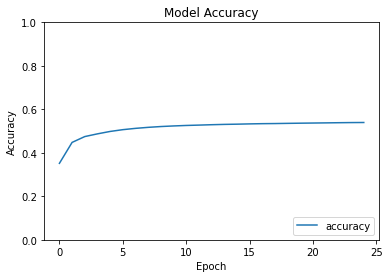

In [22]:
import matplotlib.pyplot as plt
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

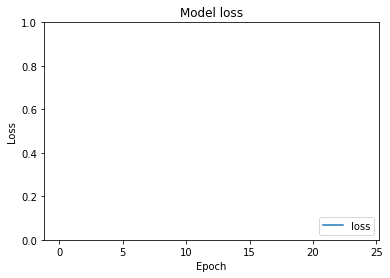

In [23]:
plt.title('Model loss')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [24]:
Class_names = [
'ND',
'BF',
'UR',
'BRF',
'RM',
'BRBF',
'VUSFF',
'PUSPF',
'MPUSPF',
'MSWF',
'SWF']

#removing missing file names
Class_names.remove('PUSPF')
Class_names.remove('MPUSPF')

In [25]:
predictions = model.predict(test_dataset, batch_size=10, verbose=0)

In [26]:
predictions

array([[1.6789669e-01, 1.2339085e-02, 7.0566311e-02, ..., 1.7796454e-01,
        7.6956756e-02, 7.3850438e-02],
       [3.6771860e-04, 9.9663925e-01, 2.7397944e-06, ..., 2.7599235e-03,
        4.1977941e-07, 1.6980456e-08],
       [2.6479555e-07, 2.3527461e-08, 1.6334069e-07, ..., 1.2320622e-07,
        3.3614374e-04, 9.9964368e-01],
       ...,
       [9.2236456e-05, 9.2800753e-03, 5.6569206e-05, ..., 6.3261623e-04,
        2.3891394e-06, 1.0653679e-09],
       [5.1230133e-02, 4.5758229e-02, 7.8672275e-02, ..., 3.9098096e-01,
        5.1982798e-02, 7.7581182e-03],
       [6.3703632e-01, 2.2124439e-04, 1.0462135e-02, ..., 4.1663432e-03,
        1.0969405e-05, 9.0873064e-06]], dtype=float32)

In [27]:
predicted_classes = model.predict_classes(test_dataset, batch_size=10, verbose=0)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
predicted_classes

array([5, 1, 8, ..., 3, 6, 0])

In [29]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_true=y_test_copy, y_pred=predicted_classes)
confusion_matrix

array([[33565,  2060,  7400,  8290,  9530,  7595, 14187,  1027,   497],
       [ 1496, 52387, 10180,  7079,  2184,  1571,  8424,   569,    23],
       [ 7283,  6655, 40988,  5367,  4606,  3860, 13259,  1426,   195],
       [ 8208,  3431,  5507, 38352,  6673,  5770, 14795,   806,   144],
       [ 7747,  1701,  2056,  6214, 41772,  3695,  6866,   552,   846],
       [15616,   986,  6883, 11056,  6537, 27166, 14538,  1394,   222],
       [ 6402,  3969, 11157,  8480,  3887,  4117, 44720,  1647,   159],
       [ 3125,   667,  1144,  1251,  3680,  1914,  2854, 57766, 11560],
       [ 1404,    94,   245,   418,  3090,   614,   698,  5169, 72393]])

In [30]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()



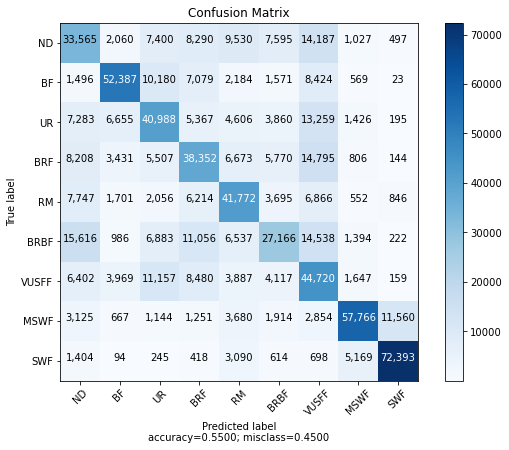

In [31]:
plot_confusion_matrix(confusion_matrix, 
                      normalize    = False,
                      target_names = Class_names,
                      title        = "Confusion Matrix")

In [32]:
report = metrics.classification_report(y_test_copy, predicted_classes)
print(report)  

              precision    recall  f1-score   support

         0.0       0.40      0.40      0.40     84151
         1.0       0.73      0.62      0.67     83913
         2.0       0.48      0.49      0.48     83639
         3.0       0.44      0.46      0.45     83686
         4.0       0.51      0.58      0.54     71449
         5.0       0.48      0.32      0.39     84398
         6.0       0.37      0.53      0.44     84538
         7.0       0.82      0.69      0.75     83961
         8.0       0.84      0.86      0.85     84125

    accuracy                           0.55    743860
   macro avg       0.56      0.55      0.55    743860
weighted avg       0.56      0.55      0.55    743860



In [33]:
# save model and architecture to single file
model.save("Model_NN_9_classes.h5")
print("Saved model to disk")

Saved model to disk
